In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

from scikitplot.helpers import cumulative_gain_curve
from sklearn.metrics import roc_auc_score
from scikitplot.helpers import binary_ks_curve 
from scikitplot.metrics import plot_ks_statistic

In [2]:
#4 semanas atras
YYYYMMDD = 20210404

cnx = snowflake.connector.connect(user = 'CWC_DS',
                                  password = "CWCStrata#2@2@",
                                  account = "NPA44105.us-east-1",
                                  role = "SYSADMIN",
                                  warehouse = "COMPUTE_WH_DS",
                                  database = "STRATA_DW",
                                  schema = "CWC_DS",
                                  )
cur = cnx.cursor().execute("SELECT A.FECHA_CORTE, A.GRUPO , NORECH1W_SCORE, CASE WHEN PREP_RECH_Q_EVT_W_0=0  THEN 1 ELSE 0 END AS TARGET FROM CWC_DS.NORECH4W_SCORE A LEFT JOIN CWC_DS.J_AN_ABT_NORECH4_4W B ON SPLIT_PART(B.SUSCRIBER_KEY, '_', 3)=A.MSISDN AND B.FECHA_CORTE=to_date('"+str(YYYYMMDD)+"','YYYYMMDD') WHERE A.ORG_ID=338 AND A.FECHA_CORTE='"+str(YYYYMMDD)+"' ORDER BY A.FECHA_CORTE")
ret = cur.fetchall()
SCORES = DataFrame(ret,columns=['FECHA_CORTE','GROUP','SCORE','TARGET'])
SCORES['SCORE'] = SCORES['SCORE'].astype(float)
#LIFT NORECH1W
classes = np.unique(SCORES[SCORES['GROUP']=='PI']['TARGET'])
percentages, gains = cumulative_gain_curve(SCORES[SCORES['GROUP']=='PI']['TARGET'], SCORES[SCORES['GROUP']=='PI']['SCORE'],
                                                classes[1])
percentages = percentages[1:]
gains = gains[1:]
gains = gains / percentages
indice=round(len(gains)*0.1)
print('LIFT NORECH1W:')
print(gains[indice])
print('KS NORECH1W:')
thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(SCORES[SCORES['GROUP']=='PI']['TARGET'],SCORES[SCORES['GROUP']=='PI']['SCORE'].ravel())
print(ks_statistic)
percentiles = pd.qcut( SCORES[SCORES['GROUP']=='PI']['SCORE'], q=10, duplicates='drop').astype(str) 
percentile_label = { p:l for l,p in enumerate(sorted(percentiles.unique(),reverse=True), start=1) }  
percentiles = percentiles.map(percentile_label)
SCORES['DECILE'] = np.nan
SCORES['DECILE'] = SCORES['DECILE'].astype('Int32')
SCORES['DECILE'] = percentiles
print('CAPTURA 30%:')
print(sum(SCORES[(SCORES['GROUP']=='PI') & (SCORES['DECILE']<4)]['TARGET'])/sum(SCORES[SCORES['GROUP']=='PI']['TARGET']))
METRICS= SCORES[['FECHA_CORTE']].head(1)
METRICS['ORG_ID'] = 338
METRICS['MODELO']= 'NORECH1W_SCORE'
METRICS['LIFT']= gains[indice]
METRICS['KS']= ks_statistic
METRICS['CAPTURE30']= sum(SCORES[(SCORES['GROUP']=='PI') & (SCORES['DECILE']<4)]['TARGET'])/sum(SCORES[SCORES['GROUP']=='PI']['TARGET'])
# Insert en Tabla Snowflake
write_pandas(cnx, METRICS, "METRICS_MODELS")

LIFT NORECH1W:
1.355065053297195
KS NORECH1W:
0.3531523838153752
CAPTURA 30%:
0.38478152352804534


(True,
 1,
 1,
 [('dqser/file0.txt', 'LOADED', 1, 1, 1, 0, None, None, None, None)])

In [3]:
cur = cnx.cursor().execute("SELECT A.FECHA_CORTE, A.GRUPO , NORECH2W_SCORE, CASE WHEN PREP_RECH_Q_EVT_W_0=0  and PREP_RECH_Q_EVT_W_1=0  THEN 1 ELSE 0 END AS TARGET FROM CWC_DS.NORECH4W_SCORE A LEFT JOIN CWC_DS.J_AN_ABT_NORECH4_4W B ON SPLIT_PART(B.SUSCRIBER_KEY, '_', 3)=A.MSISDN AND B.FECHA_CORTE=to_date('"+str(YYYYMMDD)+"','YYYYMMDD') WHERE A.ORG_ID=338 AND A.FECHA_CORTE='"+str(YYYYMMDD)+"' ORDER BY A.FECHA_CORTE")
ret = cur.fetchall()
SCORES = DataFrame(ret,columns=['FECHA_CORTE','GROUP','SCORE','TARGET'])
SCORES['SCORE'] = SCORES['SCORE'].astype(float)
#LIFT NORECH1W
classes = np.unique(SCORES[SCORES['GROUP']=='PI']['TARGET'])
percentages, gains = cumulative_gain_curve(SCORES[SCORES['GROUP']=='PI']['TARGET'], SCORES[SCORES['GROUP']=='PI']['SCORE'],
                                                classes[1])
percentages = percentages[1:]
gains = gains[1:]
gains = gains / percentages
indice=round(len(gains)*0.1)
print('LIFT NORECH2W:')
print(gains[indice])
print('KS NORECH2W:')
thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(SCORES[SCORES['GROUP']=='PI']['TARGET'],SCORES[SCORES['GROUP']=='PI']['SCORE'].ravel())
print(ks_statistic)
percentiles = pd.qcut( SCORES[SCORES['GROUP']=='PI']['SCORE'], q=10, duplicates='drop').astype(str) 
percentile_label = { p:l for l,p in enumerate(sorted(percentiles.unique(),reverse=True), start=1) }  
percentiles = percentiles.map(percentile_label)
SCORES['DECILE'] = np.nan
SCORES['DECILE'] = SCORES['DECILE'].astype('Int32')
SCORES['DECILE'] = percentiles
print('CAPTURA 30%:')
print(sum(SCORES[(SCORES['GROUP']=='PI') & (SCORES['DECILE']<4)]['TARGET'])/sum(SCORES[SCORES['GROUP']=='PI']['TARGET']))
METRICS= SCORES[['FECHA_CORTE']].head(1)
METRICS['ORG_ID'] = 338
METRICS['MODELO']= 'NORECH2W_SCORE'
METRICS['LIFT']= gains[indice]
METRICS['KS']= ks_statistic
METRICS['CAPTURE30']= sum(SCORES[(SCORES['GROUP']=='PI') & (SCORES['DECILE']<4)]['TARGET'])/sum(SCORES[SCORES['GROUP']=='PI']['TARGET'])
# Insert en Tabla Snowflake
write_pandas(cnx, METRICS, "METRICS_MODELS")

LIFT NORECH2W:
2.0203674203174344
KS NORECH2W:
0.4053705401570426
CAPTURA 30%:
0.5117032145842657


(True,
 1,
 1,
 [('nrhan/file0.txt', 'LOADED', 1, 1, 1, 0, None, None, None, None)])

In [4]:
cur = cnx.cursor().execute("SELECT A.FECHA_CORTE, A.GRUPO , NORECH3W_SCORE, CASE WHEN PREP_RECH_Q_EVT_W_0=0  and PREP_RECH_Q_EVT_W_1=0 and PREP_RECH_Q_EVT_W_2=0  THEN 1 ELSE 0 END AS TARGET FROM CWC_DS.NORECH4W_SCORE A LEFT JOIN CWC_DS.J_AN_ABT_NORECH4_4W B ON SPLIT_PART(B.SUSCRIBER_KEY, '_', 3)=A.MSISDN AND B.FECHA_CORTE=to_date('"+str(YYYYMMDD)+"','YYYYMMDD') WHERE A.ORG_ID=338 AND A.FECHA_CORTE='"+str(YYYYMMDD)+"' ORDER BY A.FECHA_CORTE")
ret = cur.fetchall()
SCORES = DataFrame(ret,columns=['FECHA_CORTE','GROUP','SCORE','TARGET'])
SCORES['SCORE'] = SCORES['SCORE'].astype(float)
#LIFT NORECH1W
classes = np.unique(SCORES[SCORES['GROUP']=='PI']['TARGET'])
percentages, gains = cumulative_gain_curve(SCORES[SCORES['GROUP']=='PI']['TARGET'], SCORES[SCORES['GROUP']=='PI']['SCORE'],
                                                classes[1])
percentages = percentages[1:]
gains = gains[1:]
gains = gains / percentages
indice=round(len(gains)*0.1)
print('LIFT NORECH3W:')
print(gains[indice])
print('KS NORECH3W:')
thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(SCORES[SCORES['GROUP']=='PI']['TARGET'],SCORES[SCORES['GROUP']=='PI']['SCORE'].ravel())
print(ks_statistic)
percentiles = pd.qcut( SCORES[SCORES['GROUP']=='PI']['SCORE'], q=10, duplicates='drop').astype(str) 
percentile_label = { p:l for l,p in enumerate(sorted(percentiles.unique(),reverse=True), start=1) }  
percentiles = percentiles.map(percentile_label)
SCORES['DECILE'] = np.nan
SCORES['DECILE'] = SCORES['DECILE'].astype('Int32')
SCORES['DECILE'] = percentiles
print('CAPTURA 30%:')
print(sum(SCORES[(SCORES['GROUP']=='PI') & (SCORES['DECILE']<4)]['TARGET'])/sum(SCORES[SCORES['GROUP']=='PI']['TARGET']))
METRICS= SCORES[['FECHA_CORTE']].head(1)
METRICS['ORG_ID'] = 338
METRICS['MODELO']= 'NORECH3W_SCORE'
METRICS['LIFT']= gains[indice]
METRICS['KS']= ks_statistic
METRICS['CAPTURE30']= sum(SCORES[(SCORES['GROUP']=='PI') & (SCORES['DECILE']<4)]['TARGET'])/sum(SCORES[SCORES['GROUP']=='PI']['TARGET'])
# Insert en Tabla Snowflake
write_pandas(cnx, METRICS, "METRICS_MODELS")

LIFT NORECH3W:
2.3820280435723498
KS NORECH3W:
0.3967478069107447
CAPTURA 30%:
0.5635610067591176


(True,
 1,
 1,
 [('gpcws/file0.txt', 'LOADED', 1, 1, 1, 0, None, None, None, None)])

In [5]:
cur = cnx.cursor().execute("SELECT A.FECHA_CORTE, A.GRUPO , NORECH4W_SCORE, CASE WHEN PREP_RECH_Q_EVT_W_0=0 and PREP_RECH_Q_EVT_W_1=0 and PREP_RECH_Q_EVT_W_2=0 and PREP_RECH_Q_EVT_W_3=0 THEN 1 ELSE 0 END AS TARGET FROM CWC_DS.NORECH4W_SCORE A LEFT JOIN CWC_DS.J_AN_ABT_NORECH4_4W B ON SPLIT_PART(B.SUSCRIBER_KEY, '_', 3)=A.MSISDN AND B.FECHA_CORTE=to_date('"+str(YYYYMMDD)+"','YYYYMMDD') WHERE A.ORG_ID=338 AND A.FECHA_CORTE='"+str(YYYYMMDD)+"' ORDER BY A.FECHA_CORTE")
ret = cur.fetchall()
SCORES = DataFrame(ret,columns=['FECHA_CORTE','GROUP','SCORE','TARGET'])
SCORES['SCORE'] = SCORES['SCORE'].astype(float)

#LIFT NORECH4W
classes = np.unique(SCORES[SCORES['GROUP']=='PI']['TARGET'])
percentages, gains = cumulative_gain_curve(SCORES[SCORES['GROUP']=='PI']['TARGET'], SCORES[SCORES['GROUP']=='PI']['SCORE'],
                                                classes[1])
percentages = percentages[1:]
gains = gains[1:]
gains = gains / percentages
indice=round(len(gains)*0.1)
print('LIFT NORECH4W:')
print(gains[indice])
print('KS NORECH4W:')
thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(SCORES[SCORES['GROUP']=='PI']['TARGET'],SCORES[SCORES['GROUP']=='PI']['SCORE'].ravel())
print(ks_statistic)
percentiles = pd.qcut( SCORES[SCORES['GROUP']=='PI']['SCORE'], q=10, duplicates='drop').astype(str) 
percentile_label = { p:l for l,p in enumerate(sorted(percentiles.unique(),reverse=True), start=1) }  
percentiles = percentiles.map(percentile_label)
SCORES['DECILE'] = np.nan
SCORES['DECILE'] = SCORES['DECILE'].astype('Int32')
SCORES['DECILE'] = percentiles
print('CAPTURA 30%:')
print(sum(SCORES[(SCORES['GROUP']=='PI') & (SCORES['DECILE']<4)]['TARGET'])/sum(SCORES[SCORES['GROUP']=='PI']['TARGET']))
METRICS= SCORES[['FECHA_CORTE']].head(1)
METRICS['ORG_ID'] = 338
METRICS['MODELO']= 'NORECH4W_SCORE'
METRICS['LIFT']= gains[indice]
METRICS['KS']= ks_statistic
METRICS['CAPTURE30']= sum(SCORES[(SCORES['GROUP']=='PI') & (SCORES['DECILE']<4)]['TARGET'])/sum(SCORES[SCORES['GROUP']=='PI']['TARGET'])
# Insert en Tabla Snowflake
write_pandas(cnx, METRICS, "METRICS_MODELS")

LIFT NORECH4W:
2.5511067564766647
KS NORECH4W:
0.37523389072977514
CAPTURA 30%:
0.5792725819344524


(True,
 1,
 1,
 [('eutyw/file0.txt', 'LOADED', 1, 1, 1, 0, None, None, None, None)])

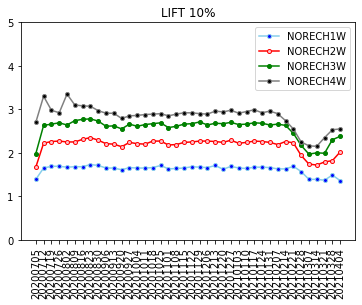

In [6]:
cur = cnx.cursor().execute("SELECT FECHA_CORTE, LIFT FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH1W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df = DataFrame(ret,columns=['FECHA_CORTE','LIFT'])
df['FECHA_CORTE'] = df['FECHA_CORTE'].astype(str)
df['LIFT'] = df['LIFT'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, LIFT FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH2W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df2 = DataFrame(ret,columns=['FECHA_CORTE','LIFT'])
df2['FECHA_CORTE'] = df2['FECHA_CORTE'].astype(str)
df2['LIFT'] = df2['LIFT'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, LIFT FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH3W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df3 = DataFrame(ret,columns=['FECHA_CORTE','LIFT'])
df3['FECHA_CORTE'] = df3['FECHA_CORTE'].astype(str)
df3['LIFT'] = df3['LIFT'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, LIFT FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH4W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df4 = DataFrame(ret,columns=['FECHA_CORTE','LIFT'])
df4['FECHA_CORTE'] = df4['FECHA_CORTE'].astype(str)
df4['LIFT'] = df4['LIFT'].astype(float)

x = df['FECHA_CORTE']
plt.ylim(0,5)

plt.plot( 'FECHA_CORTE', 'LIFT', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', label='NORECH1W')
plt.plot( 'FECHA_CORTE', 'LIFT', data=df2, marker='o', markerfacecolor='pink', markersize=4,  color='red', label='NORECH2W')
plt.plot( 'FECHA_CORTE', 'LIFT', data=df3, marker='o', markerfacecolor='green', markersize=4,  color='green', label='NORECH3W')
plt.plot( 'FECHA_CORTE', 'LIFT', data=df4, marker='o', markerfacecolor='black', markersize=4, color='grey', label='NORECH4W')
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.title("LIFT 10%")
plt.show()

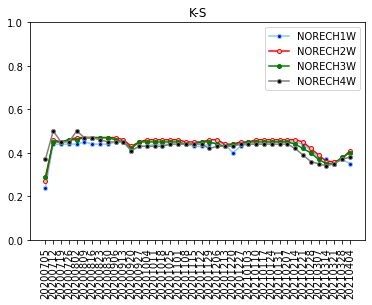

In [7]:
cur = cnx.cursor().execute("SELECT FECHA_CORTE, KS FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH1W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df = DataFrame(ret,columns=['FECHA_CORTE','KS'])
df['FECHA_CORTE'] = df['FECHA_CORTE'].astype(str)
df['KS'] = df['KS'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, KS FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH2W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df2 = DataFrame(ret,columns=['FECHA_CORTE','KS'])
df2['FECHA_CORTE'] = df2['FECHA_CORTE'].astype(str)
df2['KS'] = df2['KS'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, KS FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH3W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df3 = DataFrame(ret,columns=['FECHA_CORTE','KS'])
df3['FECHA_CORTE'] = df3['FECHA_CORTE'].astype(str)
df3['KS'] = df3['KS'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, KS FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH4W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df4 = DataFrame(ret,columns=['FECHA_CORTE','KS'])
df4['FECHA_CORTE'] = df4['FECHA_CORTE'].astype(str)
df4['KS'] = df4['KS'].astype(float)

x = df['FECHA_CORTE']
plt.ylim(0,1)

plt.plot( 'FECHA_CORTE', 'KS', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', label='NORECH1W')
plt.plot( 'FECHA_CORTE', 'KS', data=df2, marker='o', markerfacecolor='pink', markersize=4,  color='red', label='NORECH2W')
plt.plot( 'FECHA_CORTE', 'KS', data=df3, marker='o', markerfacecolor='green', markersize=4,  color='green', label='NORECH3W')
plt.plot( 'FECHA_CORTE', 'KS', data=df4, marker='o', markerfacecolor='black', markersize=4, color='grey', label='NORECH4W')
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.title("K-S")
plt.show()

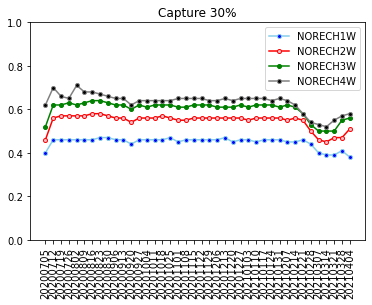

In [8]:
cur = cnx.cursor().execute("SELECT FECHA_CORTE, CAPTURE30 FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH1W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df = DataFrame(ret,columns=['FECHA_CORTE','CAPTURE30'])
df['FECHA_CORTE'] = df['FECHA_CORTE'].astype(str)
df['CAPTURE30'] = df['CAPTURE30'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, CAPTURE30 FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH2W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df2 = DataFrame(ret,columns=['FECHA_CORTE','CAPTURE30'])
df2['FECHA_CORTE'] = df2['FECHA_CORTE'].astype(str)
df2['CAPTURE30'] = df2['CAPTURE30'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, CAPTURE30 FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH3W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df3 = DataFrame(ret,columns=['FECHA_CORTE','CAPTURE30'])
df3['FECHA_CORTE'] = df3['FECHA_CORTE'].astype(str)
df3['CAPTURE30'] = df3['CAPTURE30'].astype(float)

cur = cnx.cursor().execute("SELECT FECHA_CORTE, CAPTURE30 FROM CWC_DS.METRICS_MODELS WHERE MODELO='NORECH4W_SCORE' AND ORG_ID=338 ORDER BY FECHA_CORTE")
ret = cur.fetchall()
df4 = DataFrame(ret,columns=['FECHA_CORTE','CAPTURE30'])
df4['FECHA_CORTE'] = df4['FECHA_CORTE'].astype(str)
df4['CAPTURE30'] = df4['CAPTURE30'].astype(float)

x = df['FECHA_CORTE']
plt.ylim(0,1)

plt.plot( 'FECHA_CORTE', 'CAPTURE30', data=df, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', label='NORECH1W')
plt.plot( 'FECHA_CORTE', 'CAPTURE30', data=df2, marker='o', markerfacecolor='pink', markersize=4,  color='red', label='NORECH2W')
plt.plot( 'FECHA_CORTE', 'CAPTURE30', data=df3, marker='o', markerfacecolor='green', markersize=4,  color='green', label='NORECH3W')
plt.plot( 'FECHA_CORTE', 'CAPTURE30', data=df4, marker='o', markerfacecolor='black', markersize=4, color='grey', label='NORECH4W')
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.title("Capture 30%")
plt.show()

TARGET RATE EVOLUTION

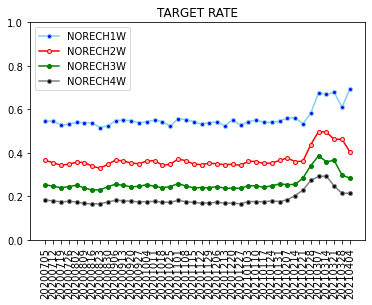

In [9]:
cur = cnx.cursor().execute("SELECT A.FECHA_CORTE, COUNT(DISTINCT A.MSISDN) AS TOTAL, SUM(CASE WHEN PREP_RECH_Q_EVT_W_0=0  THEN 1 ELSE 0 END) AS TARGET_W1 , SUM(CASE WHEN PREP_RECH_Q_EVT_W_0=0 AND PREP_RECH_Q_EVT_W_1=0 THEN 1 ELSE 0 END) AS TARGET_W2, SUM(CASE WHEN PREP_RECH_Q_EVT_W_0=0 AND PREP_RECH_Q_EVT_W_1=0 AND PREP_RECH_Q_EVT_W_2=0  THEN 1 ELSE 0 END) AS TARGET_W3 , SUM(CASE WHEN PREP_RECH_Q_EVT_W_0=0 AND PREP_RECH_Q_EVT_W_1=0 AND PREP_RECH_Q_EVT_W_2=0 AND PREP_RECH_Q_EVT_W_3=0  THEN 1 ELSE 0 END) AS TARGET_W4 FROM CWC_DS.NORECH4W_SCORE A LEFT JOIN CWC_DS.J_AN_ABT_NORECH4_4W B ON SPLIT_PART(B.SUSCRIBER_KEY, '_', 3)=A.MSISDN AND B.FECHA_CORTE=to_date('"+str(YYYYMMDD)+"','YYYYMMDD') WHERE A.ORG_ID=338 AND A.FECHA_CORTE='"+str(YYYYMMDD)+"' AND GRUPO='PI' GROUP BY A.FECHA_CORTE ORDER BY A.FECHA_CORTE")
ret = cur.fetchall()
df = DataFrame(ret,columns=['FECHA_CORTE','TOTAL','TARGET_1','TARGET_2','TARGET_3','TARGET_4'])

df['TARGET_W1'] = df['TARGET_1']/df['TOTAL']
df['TARGET_W2'] = df['TARGET_2']/df['TOTAL']
df['TARGET_W3'] = df['TARGET_3']/df['TOTAL']
df['TARGET_W4'] = df['TARGET_4']/df['TOTAL']

TARGETS=df[['FECHA_CORTE']].head(1)
TARGETS['ORG_ID'] = 338
TARGETS['MODELO']= 'NORECH4W_SCORE'
TARGETS['TARGET_W1'] = df['TARGET_W1']
TARGETS['TARGET_W2'] = df['TARGET_W2']
TARGETS['TARGET_W3'] = df['TARGET_W3']
TARGETS['TARGET_W4'] = df['TARGET_W4']
# TARGETS
# Insert en Tabla Snowflake
write_pandas(cnx, TARGETS, "TARGET_MODELS")

cur = cnx.cursor().execute("SELECT FECHA_CORTE, TARGET_W1, TARGET_W2, TARGET_W3, TARGET_W4 FROM CWC_DS.TARGET_MODELS A WHERE A.ORG_ID=338 AND A.MODELO='NORECH4W_SCORE' ORDER BY A.FECHA_CORTE")
ret = cur.fetchall()
df4 = DataFrame(ret,columns=['FECHA_CORTE','TARGET_W1','TARGET_W2','TARGET_W3','TARGET_W4'])

x = df4['FECHA_CORTE']
df4['FECHA_CORTE'] = df4['FECHA_CORTE'].astype(str)
df4['TARGET_W1'] = df4['TARGET_W1'].astype(float)
df4['TARGET_W2'] = df4['TARGET_W2'].astype(float)
df4['TARGET_W3'] = df4['TARGET_W3'].astype(float)
df4['TARGET_W4'] = df4['TARGET_W4'].astype(float)
plt.ylim(0,1)

plt.plot( 'FECHA_CORTE', 'TARGET_W1', data=df4, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', label='NORECH1W')
plt.plot( 'FECHA_CORTE', 'TARGET_W2', data=df4, marker='o', markerfacecolor='pink', markersize=4,  color='red', label='NORECH2W')
plt.plot( 'FECHA_CORTE', 'TARGET_W3', data=df4, marker='o', markerfacecolor='green', markersize=4,  color='green', label='NORECH3W')
plt.plot( 'FECHA_CORTE', 'TARGET_W4', data=df4, marker='o', markerfacecolor='black', markersize=4, color='grey', label='NORECH4W')
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.title("TARGET RATE")
plt.show()